> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have select TMDb movie data set to explore. During the analysis, I will try to answer following questions.
1. Does runtime effect the budget? For instances, for longer movies, do we need more budget?
2. How budget,runtime and revenue is changing among vote average?




In [88]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline


Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
>I will load tmdb-movies dataset

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning Part
>In previous section, I have loaded the dataset and by displaying it, I have observed its properties.
According to data analysis questions in the introduction part, I have decided to delete unuseful parts to make data more clear.
And for the remaining parts, if NA content label occurs, I have also remove them. Because I have no chance to fulfill that parts by using mean and averages techniques.

In [89]:
#movie_df.info()
movie_df = pd.read_csv('tmdb-movies.csv')
del movie_df['id']
del movie_df['imdb_id']
del movie_df['homepage']
del movie_df['tagline']
del movie_df['overview']
del movie_df['release_date']
del movie_df['keywords']
del movie_df['production_companies']
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


#### Observations:
>After deleting unuseful parts, in dataset we have some inequalities for object value. 
Therefore we need to check null values.


In [90]:
#Display the total null values of all labels
movie_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

#### Observations:
>It is seen that cast,director and genres labels have null values. From the dataset and label characteristics, it is not possible to fulfill these areas by looking their preceeding and proceeding values. So we need to clear that labels from dataset.

In [91]:
#cast,director,production_companies tabs have missing parts. So we need to fix them.
clean_data = movie_df.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [92]:
#Check clean data has a null value or not to be sure
clean_data.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

#### Observations:
>After cleaning the null parts, all labels of dataset have the same value count. And with null.sum, it is double-checked.

In [93]:
#After cleaning na parts from data, we can look correlations between dataset variables.
clean_data.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.544231,0.662841,0.138279,0.800618,0.217901,0.093038,0.512094,0.608382
budget,0.544231,1.000000,0.734460,0.192149,0.632057,0.087265,0.119031,0.968881,0.621782
revenue,0.662841,0.734460,1.000000,0.164285,0.790889,0.178499,0.059049,0.705931,0.918990
runtime,0.138279,0.192149,0.164285,1.000000,0.164971,0.177299,-0.119304,0.222631,0.177407
vote_count,0.800618,0.632057,0.790889,0.164971,1.000000,0.260559,0.110303,0.586287,0.707518
vote_average,0.217901,0.087265,0.178499,0.177299,0.260559,1.000000,-0.127803,0.099885,0.199440
release_year,0.093038,0.119031,0.059049,-0.119304,0.110303,-0.127803,1.000000,0.019401,-0.064970
budget_adj,0.512094,0.968881,0.705931,0.222631,0.586287,0.099885,0.019401,1.000000,0.645918
revenue_adj,0.608382,0.621782,0.918990,0.177407,0.707518,0.199440,-0.064970,0.645918,1.000000


#### Observations:
>In above correlation table, we can see that correlation between each label, which are integer properties.
By looking correlation factor at first glance, most correlated data labels and less correlateds can be seen.
There are some negative correlation factors, for example runtime and release year, negativeness implies that there is a cross relation between these labels. In other words, when one of the label is increasing, other one is decreasing.
In following part, histogram of each data label will be shown.

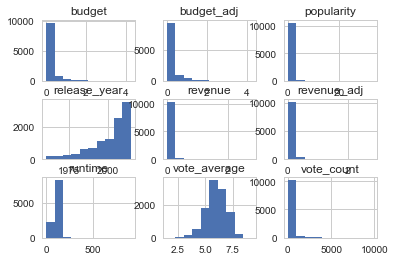

In [94]:
#In order to see data distribution of labels histograms are shown below.
clean_data.hist();

#### Observations:
> Histogram of the labels show similar inditications like correlation table. It is clearly seen that release year and runtime have opposite characteristic.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 

### Runtime and Budget Relationship

> First I want to explore the relation between runtime and budget.Because in correlation diagram, it is seen that runtime and budget has correlation around 0.2. Which indicates that when we plot the relation, result should be scattered.

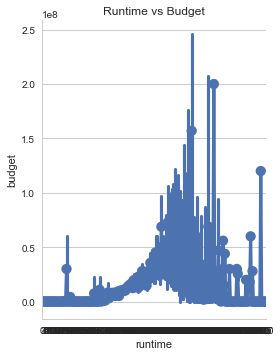

In [95]:
sns.factorplot(data=clean_data, x='runtime', y='budget',size=5, aspect=.8)
plt.title('Runtime vs Budget');
plt.show() 

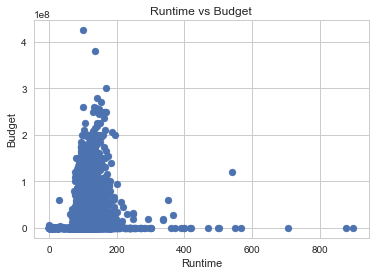

In [96]:
plt.scatter(x=clean_data['runtime'], y=clean_data['budget']);
plt.xlabel('Runtime')
plt.ylabel('Budget')
plt.title('Runtime vs Budget');

#### Observations:
>For observing relationship between runtime and budget, I have used two different plot option factorplot and scatter. For me, observing with scatter is easier.By looking at graph we can say that, until some point like 170, there is a strong relationship between runtime and budget. Both increases. However after that point, when runtime increases, budget does not increase, it has decreasing property but at some points, budget has outliers.
And movie which has the most budget is not the longest one.
Interesting part is there are some movies which they do not need any budget.

### Research Question 2 

### How budget, runtime and popularity is changing over average vote?

>In order to investigate, this problem first dataset should be modified according to average_vote. 
Because our main three questionere label will be changed to average vote value.

In [62]:
voting_data = clean_data.groupby('vote_average')
voting_data.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015,1.609999e+08,7.854116e+08


In [117]:
voting_data['vote_average'].value_counts()
vote_mean = voting_data.mean()
vote_mean.head()

,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj
vote_average,,,,,,,,
1.5,0.078520,9.500000e+03,0.000000e+00,80.000000,12.500000,1986.500000,6.382114e+04,0.000000e+00
2.0,0.079281,0.000000e+00,0.000000e+00,75.000000,13.000000,2012.000000,0.000000e+00,0.000000e+00
2.1,0.155900,0.000000e+00,3.036441e+06,90.000000,19.333333,2008.333333,0.000000e+00,3.505405e+06
2.2,0.051765,2.166667e+07,2.456867e+04,87.333333,14.333333,2012.333333,2.057779e+07,2.333395e+04
2.3,0.181587,0.000000e+00,0.000000e+00,92.500000,15.000000,1996.500000,0.000000e+00,0.000000e+00


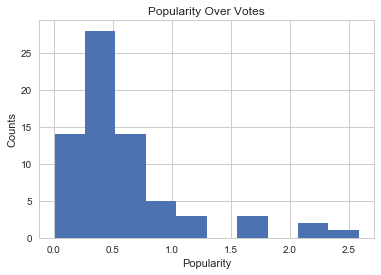

In [98]:
vote_mean['popularity'].hist(bins=10);
plt.xlabel('Popularity')
plt.ylabel('Counts')
plt.title('Popularity Over Votes');

#### Observations:
> Popularity among vote_average has higher around 0.5

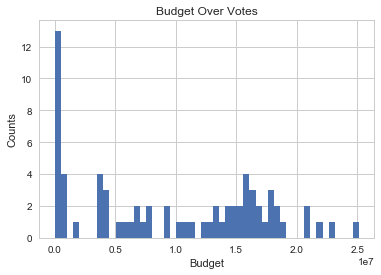

In [99]:
vote_mean['budget'].hist(bins=50);
plt.xlabel('Budget')
plt.ylabel('Counts')
plt.title('Budget Over Votes');

#### Observations:
> Here I have changed bins of histogram to see data more clearly. 
> Budget among votes has higher distribution around 0.02e7. After that we can say that, budget count does not oscillate too much.

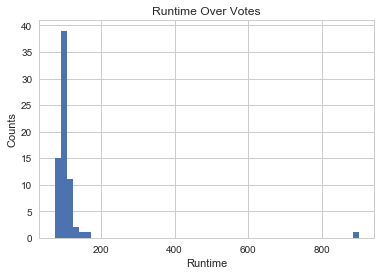

In [119]:
vote_mean['runtime'].hist(bins=50);
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime Over Votes');

#### Observations:
> Among the votes, shorter movies has higher ratings.

<a id='conclusions'></a>
## Conclusions
> I have listed my observations after nearly every step. However in general I have tried to observe;
1. Relationship between in all data by looking correlation diagram/table.
2. Runtime and Budget relationship without making any specifications.
3. Relationships filtered by average vote.

>There are some missing parts in the dataset and fulfilling them is not possible. Therefore, data lost is occurs.
>In order to make statistical observations, I have used stackoverflow post to find out best way.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Movie_DataSet.ipynb'])

0